#### OBJETIVO

> Explorar os dados historicos de gasolina no Brasil, verificar os principais players do mercado, a relação <br/>
> de preço do litro com o salário mínimo do mesmo período. Verificaremos também os estados com os maiores <br/>
> e menores valores do seguimento, estados com mais pesquisa e preço médio por bandeiras.

#### FONTE DE DADOS

> Historico de Salários :: https://www.contabeis.com.br/tabelas/salario-minimo/ <br/>
> Histórico Preço dos Combustíveis :: https://basedosdados.org/dataset/br-anp-precos-combustiveis

#### BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### CARREGAR DADOS

##### DADOS COMBUSTIVEL

In [2]:
df_combustivel = pd.read_csv('histCombustivel.csv', sep = ',')

In [3]:
# TAMANHO DOS DADOS
df_combustivel.shape

(26514824, 14)

In [4]:
df_combustivel.head(3)

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda
0,2004,MG,3170701,CENTRO,37002-040,"PRACA MARECHAL FLORIANO,100",86.437.472/0001-21,SANTA LUIZA DERIVADOS DE PETROLEO LTDA,BRANCA,2004-05-10,etanol,R$/litro,0.9367,1.280
1,2004,SP,3554102,VILA SAO JOSE,12070-590,"AVENIDA DOM DUARTE LEOPOLDO E SILVA,501",03.842.497/0001-83,AUTO POSTO ANA ROSA TAUBATE LTDA - EPP,ALE COMBUSTÍVEIS,2004-05-10,gasolina,R$/litro,1.7020,1.899
2,2004,SP,3554102,PARQUE SAO LUIS,12061-600,"RUA PADRE FISCHER,1487",01.583.271/0001-80,ABOU HALA & IBANHES AUTO POSTO LTDA.,BRANCA,2004-05-10,diesel,R$/litro,NaN,1.399


##### DADOS SALARIO MINIMO

In [54]:
df_salario = pd.read_excel('histSalarioMinimo.xlsx', usecols = ['Ano', 'Valor'])
display(df_salario.head(3))
display(df_salario.shape)

,Ano,Valor
0,2021,1100
1,2020,1045
2,2019,998


(19, 2)

#### PREPARAÇÃO DOS DADOS

> Para fazer a comparação do salário mínimo com o preço do combutível, é necessário juntar os dados <br/>
> em um só data frame levando em consideração o ano. <br/><br/>

> A granularidade das variáveis "SALARIO" e "GASOLINA" são diferentes, uma é anual e a outra <br/>
> mensal, respectivamente, dessa forma é necessário sumarizar os dados da gasolina levando para a <br/>
> mesma granularidade do salario, que nesse caso é anual. Diante do exposto, vamos utilizar a média <br/>
> da gasolina para termos o valor anual.


In [55]:
# TIPOS DE COMBUSTIVEIS
df_combustivel.produto.value_counts()

gasolina              7066140
etanol                6554200
glp                   5413252
diesel                5231119
diesel s10            1670878
gnv                    405778
gasolina aditivada     128961
diesel s50              44495
etano                       1
Name: produto, dtype: int64

> Vamos filtrar os dados e seguir somente com as informações do combustível GASOLINA

In [56]:
# FILTRANDO OS DADOS APENAS PARA GASOLINA E CRIANDO UM NOVO DATA SET
df_gasolina = df_combustivel[df_combustivel['produto'] == 'gasolina']
# CONFIRMANDO O TAMANHO DO DATA SET
df_gasolina.shape

(7066140, 14)

> Definindo uma variável com as colunas que preciso, em seguida utilizo a variável no data set, retornando somente as colunas necessárias

In [57]:
columns = [ 'ano',
            'sigla_uf',
            'bairro_revenda',
            'cep_revenda',
            'bandeira_revenda',
            'data_coleta',
            'preco_venda'
]

df_gasolina = df_gasolina[columns]
df_gasolina.head(3)

,ano,sigla_uf,bairro_revenda,cep_revenda,bandeira_revenda,data_coleta,preco_venda
1,2004,SP,VILA SAO JOSE,12070-590,ALE COMBUSTÍVEIS,2004-05-10,1.899
4,2004,SP,PARQUE SAO LUIS,12061-600,BRANCA,2004-05-10,1.899
8,2004,SP,INDEPENDÊNCIA,12091-000,PETROBRAS DISTRIBUIDORA S.A.,2004-05-10,1.959


> Sumarizar os dados do preço do combustivel por ano. O resultado será a média.

In [58]:
# AGRUPAR OS DADOS POR ANO, O VALOR FINAL DO ANO SERÁ A MÉDIA
df_gasolina_agrup_ano = df_gasolina.groupby(by = 'ano').agg({'preco_venda': 'mean'}).reset_index()
# ARREDONDAR O VALOR DO COMBUSTIVEL PARA DUAS CASAS DECIMAIS
df_gasolina_agrup_ano.preco_venda = df_gasolina_agrup_ano.preco_venda.apply(lambda x: round(x, 2))
df_gasolina_agrup_ano

,ano,preco_venda
0,2004,2.14
1,2005,2.36
2,2006,2.59
3,2007,2.55
4,2008,2.54
5,2009,2.55
6,2010,2.60
7,2011,2.76
8,2012,2.77
9,2013,2.89


> Junção dos preços do combustivel e salario mínimo

In [59]:
display(df_gasolina_agrup_ano.head(2))
display(df_salario.head(2))

,ano,preco_venda
0,2004,2.14
1,2005,2.36


,Ano,Valor
0,2021,1100
1,2020,1045


> Junção dos dados em um só data frame

In [60]:
# JUNTAR OS DADOS, O ANO SERÁ USADO COMO CHAVE COMUM ENTRE OS DATA SETS
df_gasolina_salario = pd.merge(left = df_gasolina_agrup_ano, right = df_salario, left_on = 'ano', right_on = 'Ano', how = 'left')
# RESULTADO
df_gasolina_salario

,ano,preco_venda,Ano,Valor
0,2004,2.14,2004,260
1,2005,2.36,2005,300
2,2006,2.59,2006,350
3,2007,2.55,2007,380
4,2008,2.54,2008,415
5,2009,2.55,2009,465
6,2010,2.60,2010,510
7,2011,2.76,2011,545
8,2011,2.76,2011,540
9,2012,2.77,2012,622


In [61]:
# EXCLUINDO VARIAVEL DE ANO REPETIDA
df_gasolina_salario = df_gasolina_salario.drop(columns=['Ano'])
# RENOMEANDO VARIAVEIS
df_gasolina_salario = df_gasolina_salario.rename(columns = {'preco_venda': 'vlr_combust', 'Valor': 'vlr_salario'})
# RESULTADO FINAL
df_gasolina_salario.head(3)

,ano,vlr_combust,vlr_salario
0,2004,2.14,260
1,2005,2.36,300
2,2006,2.59,350


> Enriquecimento dos dados 01: calculando o quanto 35 litros (capacidade média ded um automóvel) de gasolina representam do salário mínimo. <br/>
> Enriquecimento dos dados 02: calculando o poder de compra do salário, ou seja, quantos litros é possível comprar

In [62]:
# CALCULAR O PERCENTUAL DO SALARIO A CADA 35 LITROS
df_gasolina_salario['%_salario'] = (df_gasolina_salario.vlr_combust * 35 ) / df_gasolina_salario.vlr_salario * 100
# CALCULAR O PODER DE COMPRA
df_gasolina_salario['poder_de_compra_litros'] = round(df_gasolina_salario.vlr_salario / df_gasolina_salario.vlr_combust, 2)
# TRANSFORMAR A VARIAVEL ANO EM STRING
df_gasolina_salario.ano = df_gasolina_salario.ano.astype('str')
# RESULTADO
df_gasolina_salario

,ano,vlr_combust,vlr_salario,%_salario,poder_de_compra_litros
0,2004,2.14,260,28.807692,121.50
1,2005,2.36,300,27.533333,127.12
2,2006,2.59,350,25.900000,135.14
3,2007,2.55,380,23.486842,149.02
4,2008,2.54,415,21.421687,163.39
5,2009,2.55,465,19.193548,182.35
6,2010,2.60,510,17.843137,196.15
7,2011,2.76,545,17.724771,197.46
8,2011,2.76,540,17.888889,195.65
9,2012,2.77,622,15.586817,224.55


#### ANÁLISE GRAFICA

> O poder compra indica quantos litros é possível comprar com todo o salário mínimo. <br/>
> No gráfico seguinte conseguimos concluir que o poder de compra da gasolina cai desde o inicio de 2020, voltando <br/>
> ao mesmo nível de 2011.

,ano,poder_de_compra_litros
7,2011,197.46
8,2011,195.65
9,2012,224.55
10,2013,234.60
11,2014,240.53
12,2015,235.22
13,2016,235.92
14,2017,248.54
15,2018,214.38
16,2019,225.79


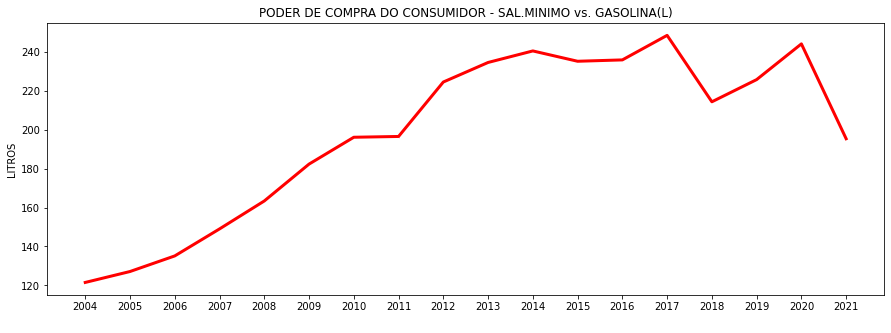

In [63]:
fig = plt.figure(figsize=[15, 5])
plt.title('PODER DE COMPRA DO CONSUMIDOR - SAL.MINIMO vs. GASOLINA(L)')
sns.lineplot(x = df_gasolina_salario['ano'],\
             y = df_gasolina_salario['poder_de_compra_litros'],\
             linewidth = 3,\
             color = 'red')
plt.ylabel('LITROS')
plt.xlabel(' ') ;

display(df_gasolina_salario[['ano', 'poder_de_compra_litros']].tail(12))

> No ano de 2021 o poder de compra caiu em relação ao ano de 2020

In [90]:
poder_2020 = df_gasolina_salario['poder_de_compra_litros'][df_gasolina_salario.ano == '2020'].item()
poder_2021 = df_gasolina_salario['poder_de_compra_litros'][df_gasolina_salario.ano == '2021'].item()
poder_20x21 = (f'{round((poder_2021 / poder_2020 - 1) * 100, 2)}%')
display(f'O poder de compra da gasolina caiu {poder_20x21} de 2020 para 2021')


'O poder de compra da gasolina caiu -19.98% de 2020 para 2021'

> Levando em consideração o tamanho médio do tanque dos automóveis, de 35 litros, podemos verificar também que <br/>
> para encher o tanque o consumidor passou a dedicar quase 18% do salario em 2021 contra 14% em 2020.

,ano,%_salario
17,2020,14.334928
18,2021,17.913636


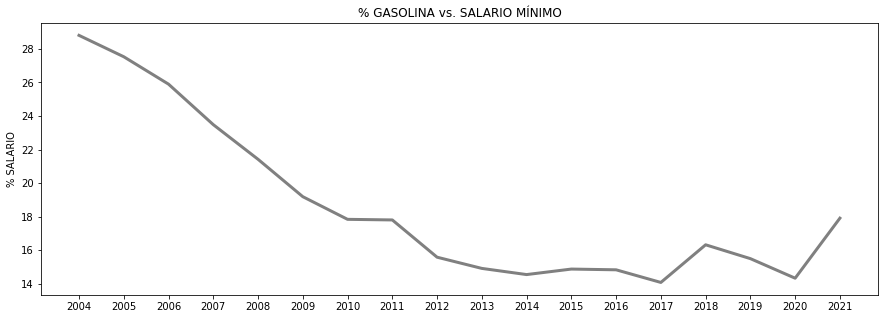

In [93]:
fig = plt.figure(figsize=[15, 5])
plt.title('% GASOLINA vs. SALARIO MÍNIMO')
sns.lineplot(x = df_gasolina_salario['ano'],\
             y = df_gasolina_salario['%_salario'],\
             linewidth = 3,
             color = 'grey')
plt.ylabel('% SALARIO')
plt.xlabel(' ') ;

display(df_gasolina_salario[['ano', '%_salario']].tail(2))

> No gráfico de boxplot abaixo podemos verificar não somente o aumento da gasolina em relação aos anos <br/>
> anteriores, mas tambem foi o ano com a maior variação dos preços, representado pelos pontos de outliers <br/>
> e uma maior abertura do corpo do box.

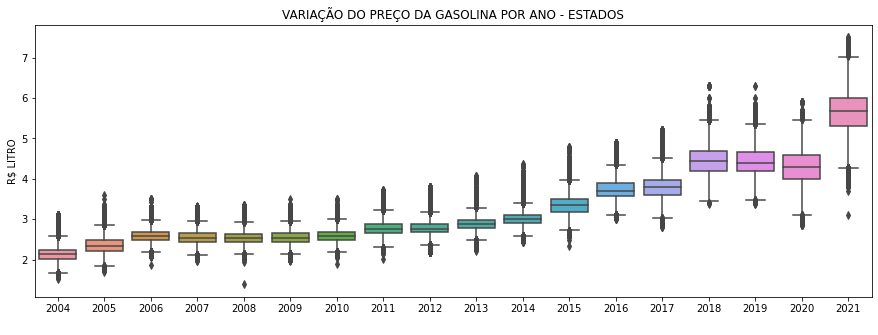

In [19]:
fig = plt.figure(figsize=[15, 5])
plt.title('VARIAÇÃO DO PREÇO DA GASOLINA POR ANO - ESTADOS')
sns.boxplot(x = df_gasolina['ano'], y = df_gasolina['preco_venda'])
plt.ylabel('R$ LITRO')
plt.xlabel(' ') ;

> Abaixo a variação dos preços por estado no ano de 2021

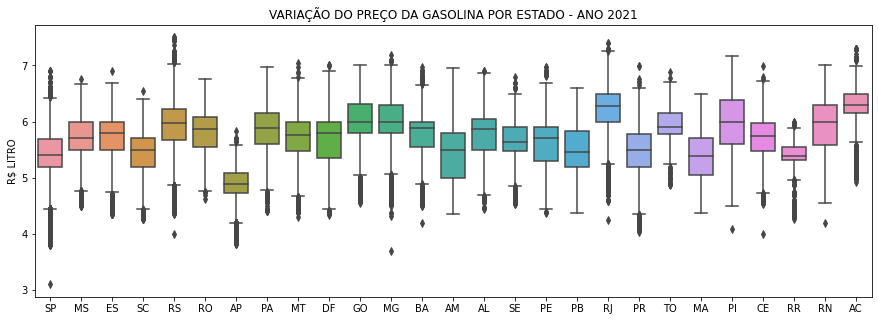

In [20]:
fig = plt.figure(figsize=[15, 5])
plt.title('VARIAÇÃO DO PREÇO DA GASOLINA POR ESTADO - ANO 2021')
sns.boxplot(x = df_gasolina['sigla_uf'], y = df_gasolina['preco_venda'][df_gasolina.ano == 2021])
plt.ylabel('R$ LITRO')
plt.xlabel(' ') ;


> Abaixo o preço médio por estado no ano de 2021. <br/>
> Acre (AC) ocupando a primeira colocação e Amapá (AP) a última

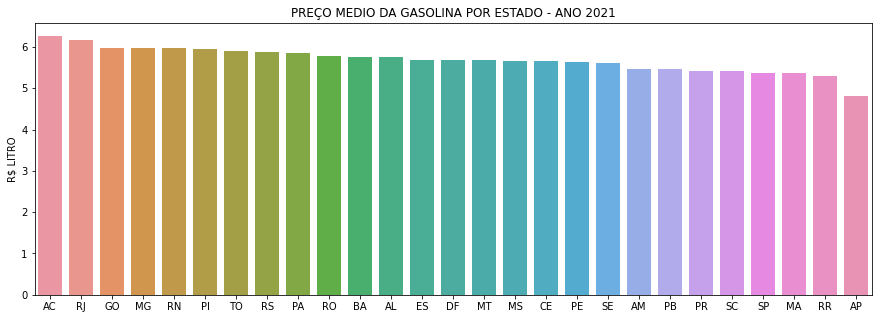

In [21]:
df_gasolina_uf_2021 = df_gasolina[df_gasolina.ano == 2021].groupby(by = 'sigla_uf').agg({'preco_venda': 'mean'}).reset_index()
df_gasolina_uf_2021 = df_gasolina_uf_2021.sort_values(by = 'preco_venda', ascending = False)

fig = plt.figure(figsize=[15, 5])
plt.title('PREÇO MEDIO DA GASOLINA POR ESTADO - ANO 2021')
sns.barplot(x = df_gasolina_uf_2021['sigla_uf'], y = df_gasolina_uf_2021['preco_venda'])
plt.ylabel('R$ LITRO')
plt.xlabel(' ') ;


> Plotando as cinco maiores bandeiras pesquisadas em 2021 <br/>
> Verifica-se que, entre as 5+, 40% das pesquisas foram feitas em postos com Bandeira Branca (postos não filiados <br/>
> à marcas famosas nacionais ou internacionais)

,bandeira,contagem,%
0,BRANCA,58095,40.41
1,PETROBRAS DISTRIBUIDORA S.A.,32141,22.36
2,IPIRANGA,25661,17.85
3,RAIZEN,24502,17.04
4,ALESAT,3367,2.34


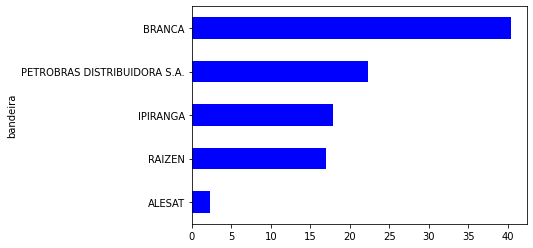

In [ ]:
df_band_2021 = pd.DataFrame(df_gasolina.bandeira_revenda[df_gasolina.ano == 2021].value_counts().head(5).reset_index())
df_band_2021 = df_band_2021.rename(columns = {'index': 'bandeira', 'bandeira_revenda': 'contagem'})
df_band_2021['%'] = round(df_band_2021['contagem'] / sum(df_band_2021['contagem']) * 100, 2)
display(df_band_2021)

df_band_2021[['bandeira', '%']].sort_values('%', ascending = True)\
                               .plot(kind = 'barh', x = 'bandeira', legend = '', color = 'blue') ;

> Plotar tabela com as 5 maiores bandeiras pesquisadas em 2021, por estado. <br/>
> Utilizarei a função de PIVOTAR a tabela (pivot_table)

In [ ]:
# VARIAVEL COM LISTA DAS 5 MAIORES BANDEIRAS PESQUISADAS EM 2021
lista_bandeira_2021 = list(df_band_2021.bandeira)
lista_bandeira_2021

['BRANCA', 'PETROBRAS DISTRIBUIDORA S.A.', 'IPIRANGA', 'RAIZEN', 'ALESAT']

In [ ]:
# CRIAR UM NOVO DF EPENAS COM AS BANDEIRAS SELECIONADAS NA VARIAVEL ANTERIOR
df_band_uf_2021 = df_gasolina[df_gasolina['bandeira_revenda'].isin(lista_bandeira_2021)][df_gasolina.ano == 2021]

# ALTERA O DF SELECIONAOD APENAS AS VARIAVEIS 'UF' E 'BANDEIRA'
df_band_uf_2021 = df_band_uf_2021[['sigla_uf', 'bandeira_revenda']]

In [ ]:
# AGRUPANDO AS VARIAVEIS PARA QUE NÃO TENHAMOS VARIAVEIS REPETIDAS NO DF
df_band_uf_2021 = df_band_uf_2021.value_counts().reset_index().rename(columns = {'sigla_uf': 'uf',
                                                                                 'bandeira_revenda': 'bandeira',
                                                                                  0: 'contagem'})

# DIMINUIR O NOME DAS BANDEIRAS PARA 10 CARACTERES
df_band_uf_2021.bandeira = df_band_uf_2021.bandeira.apply(lambda x: x[:10])

# TABELA DE PESQUISAS POR ESTADO EM 2021
df_band_uf_2021.pivot_table(index='uf', columns = 'bandeira', values='contagem', fill_value='' )

bandeira,ALESAT,BRANCA,IPIRANGA,PETROBRAS,RAIZEN
uf,,,,,
AC,,107.0,106.0,889.0,31.0
AL,29.0,608.0,141.0,526.0,271.0
AM,,490.0,165.0,362.0,73.0
AP,,589.0,106.0,242.0,
BA,88.0,3076.0,224.0,1613.0,1300.0
CE,221.0,1568.0,713.0,1980.0,1886.0
DF,,577.0,343.0,328.0,406.0
ES,92.0,712.0,408.0,822.0,577.0
GO,274.0,2119.0,582.0,693.0,519.0


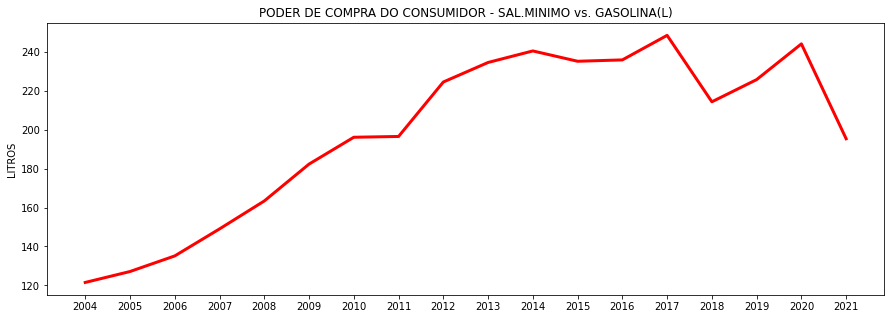

In [96]:
fig = plt.figure(figsize = [15, 5])
plt.title('PODER DE COMPRA DO CONSUMIDOR - SAL.MINIMO vs. GASOLINA(L)')
sns.lineplot(x = df_gasolina_salario['ano'],\
             y = df_gasolina_salario['poder_de_compra_litros'],\
             linewidth = 3,\
             color = 'red')
plt.ylabel('LITROS')
plt.xlabel('') ;